# 오차역전파

## 오차역전파법은 가중치 매개변수의 기울기를  효율적으로 계산하는 방법입니다.
오차역전파의 의미  
Yes / No

정답 : Yes

## 계산 그래프에 대한 내용으로 올바르지 않은 것을 고르시오.
계산 그래프  
1. 그래프는 자료구조중 하나로 노드와 엣지로 이루어져 있습니다.
2. 계산 그래프의 계산 과정은 왼쪽에서 오른쪽으로 전달되어지면 순전파이고 반대 방향은 역전파라고 부릅니다.
3. 계산 그래프의 특징은 국소적 계산을 전파하여, 마지막에는 최종결과를 얻는다는 점 입니다.
4. 국소적이라는 말은 "노드의 주위의 작은 범위"를 뜻하며, 결국 전체에서 어떤일이 벌어지든 상관없이 적은 범위의 정보만을 결과로 출력합니다.
5. 계산 그래프 하나의 노드는 단순하지만, 단순한 노드들이 모여서 복잡한 계산을 해낼 수 있습니다.

정답 : 4번 국소적이라는 말은 "자신과 직접 관계된 작은 범위"를 뜻하며, 결국 전체에서 어떤일이 벌어지든 상관없이 자신과 관계된 정보만을 결과로 출력합니다.

## 계산 그래프의 이점은 "국소적 계산"과 중간 계산 결과를 모두 저장하는 것과 역전파를 통해 미분을 효율적으로 계산할 수 있는 점이 있습니다.
계산 그래프의 이점  
Yes / No

## 연쇄법칙에 대한 내용으로 올바른 것을 고르시오.
연쇄법칙
1. 연쇄법칙은 여러 함수로 구성된 합성함수의 미분에 대한 성질입니다.
2. 합성함수의 미분은 합성 함수를 구성하는 함수의 미분들입니다.
3. $t = x + y$이고, $z = (x+y)^2$일 때, x에 대한 z의 미분을 수식으로 표현하면 $\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} * \frac{\partial t}{\partial x}$입니다.
4. $z = (x+y)^2$이고, $t = x + y$일 때, x에 대한 z의 미분값을 구하면 $2(x+y)$가 나옵니다.
5. $z = 6xy + 5$ 이고, $t = 2xy$일 때, y에 대한 z의 미분값을 구하면 $6$이 나옵니다.

정답 : 2번 합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱입니다.

## 그림의 빈칸에 들어가는 숫자를 적으시오.
덧셈노드와 곱셉노드의 역전파
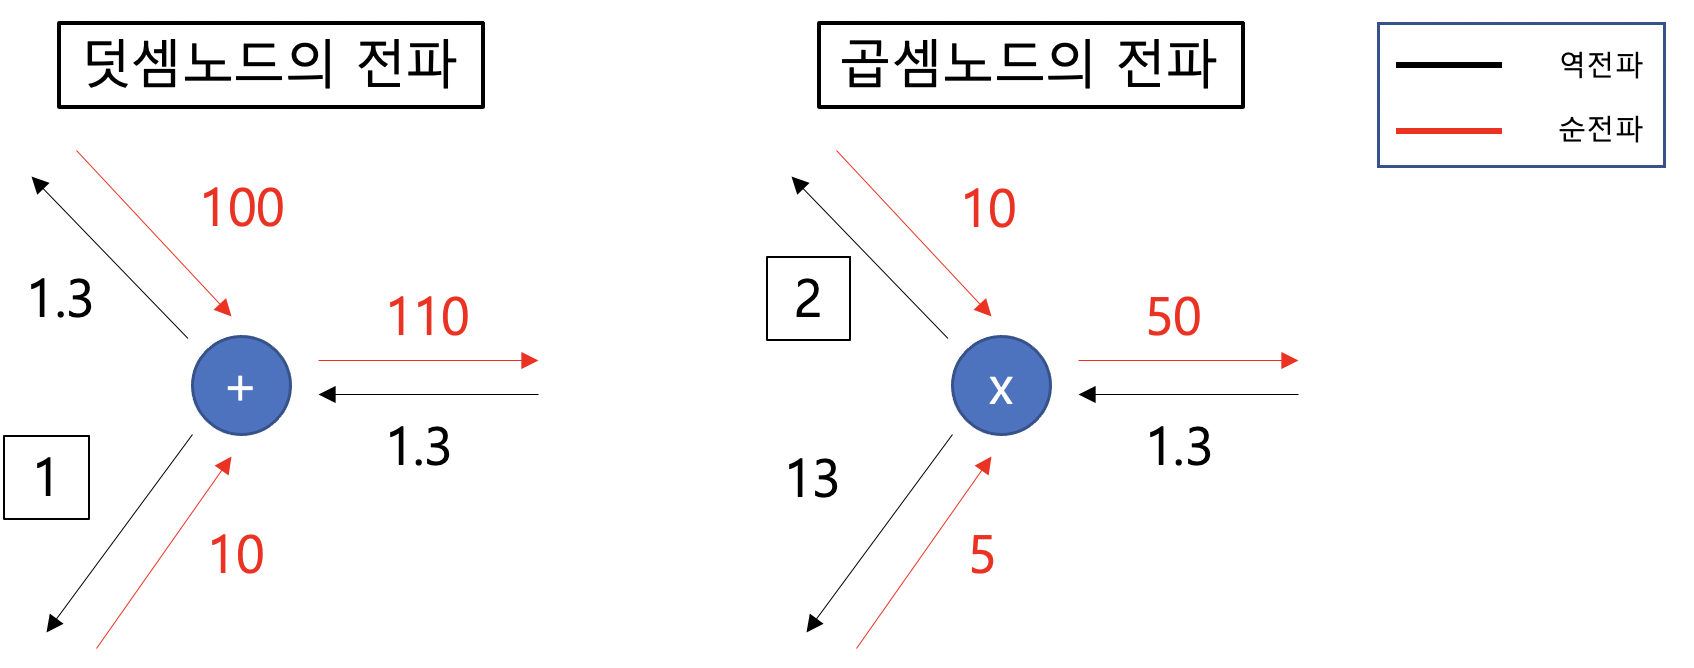
덧셈노드 빈칸 :  
곱셈노드 빈칸 : 

정답 : 덧셈노드 1.3, 곱셈노드 6.5

## 시그모이드 노드의 순전파와 역전파를 구현하시오.
시그모이드 순전파 : $y = \frac{1}{1+e^{-x}}$  
시그모이드 역전파 : $\frac{\partial Loss}{\partial x} =  \frac{\partial Loss}{\partial y}y(1-y) $ 

In [13]:
import os
os.chdir(os.pardir)

In [15]:
import numpy as np
from dataset.mnist import load_mnist
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1 + np.exp(-x)) # 빈칸
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1 - self.out) * self.out # 빈칸
        return dx

In [17]:
b = Sigmoid()
print(b.forward(9))
print(b.backward(b.forward(100)))

0.9998766054240137
0.0


## 신경망 학습의 전체적인 과정의 올바른 순서를 고르시오.
신경망 학습 과정  
ㄱ. 가중치 매개변수를 기울기 방향으로 아주 조금씩 갱신시켜 줍니다.    
ㄴ. 손실함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다.  
ㄷ. 훈련 데이터중에서 미니배치를 가져와 미니배치의 손실함수를 구합니다.  
ㄹ. 이전 과정들을 반복하여 손실함수 값이 최소가 되는 가중치를 찾습니다.  
1. ㄱ-ㄴ-ㄷ-ㄹ
2. ㄷ-ㄴ-ㄱ-ㄹ
3. ㄷ-ㄴ-ㄱ-ㄹ
4. ㄴ-ㄱ-ㄷ-ㄹ
5. ㄷ-ㄱ-ㄴ-ㄹ

정답 : 2번

In [6]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    return -np.sum((y * np.log(t)) + ((1-y) * np.log(1-t)))

In [8]:
y = np.array([0,0,1,0])
t = np.array([0.1,0.2,0.7,0.1])
cross_entropy_error(y,t)

0.7905395265685948

In [8]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None        
        self.dW = None
        self.db = None
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

In [9]:
class Soft_with_loss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx